In [1]:
using Gadfly
using Convex
using ECOS
using Interact

  likely near /home/j1/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/j1/.julia/v0.4/Interact/src/IJulia/setup.jl:157


In [2]:
function minimize_L1(X,y,lambda)
    w = Variable(size(X,2),size(y,2))
    problem = minimize(0.5*sumsquares(X*w-y)+lambda*norm(w,1))
    solve!(problem, ECOSSolver(verbose=false))
    w.value
end

function minimize_L2(X,y,lambda)
    w = Variable(size(X,2),size(y,2))
    problem = minimize(0.5*sumsquares(X*w-y)+lambda*norm(w,2))
    solve!(problem, ECOSSolver(verbose=false))
    w.value
end

minimize_L2 (generic function with 1 method)

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"lambda",0.5,0.0:0.01:1.0)

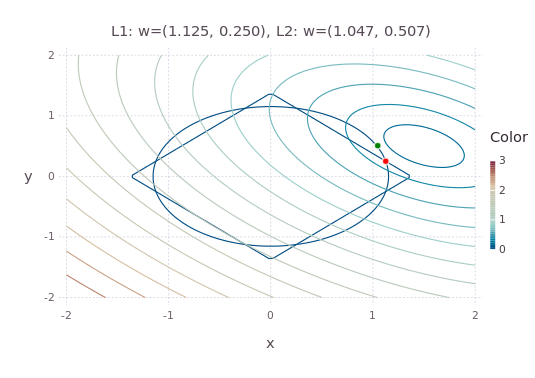

In [4]:
X = [1.0 0.5;0.0 1;]
y = [1.75, 0.5]

L(w) = 0.5*norm(X*w-y,2)
g1(w) = norm(w,1)
g2(w) = norm(w,2)

@manipulate for lambda=0.0:0.01:1.0
    w_L1 = minimize_L1(X,y,lambda)
    w_L2 = minimize_L2(X,y,lambda)
    plot(
    layer(z=(x,y)->L([x,y]), x=linspace(-2,2,100), y=linspace(-2,2,100), Geom.contour),
    layer(x=[w_L1[1]],y=[w_L1[2]],Geom.point,Theme(default_color=colorant"red")),
    layer(x=[w_L2[1]],y=[w_L2[2]],Geom.point,Theme(default_color=colorant"green")),
    layer(z=(x,y)->g1([x,y]), x=linspace(-2,2,100), y=linspace(-2,2,100), Geom.contour(levels=norm(w_L1,1))),
    layer(z=(x,y)->g2([x,y]), x=linspace(-2,2,100), y=linspace(-2,2,100), Geom.contour(levels=norm(w_L1,2))),
    Guide.title(@sprintf("L1: w=(%1.3f, %1.3f), L2: w=(%1.3f, %1.3f)",w_L1[1],w_L1[2],w_L2[1],w_L2[2]))
    )
end